# raw image path csv

In [3]:
# import os
# import csv

# def create_csv(image_folder, csv_file_path):
#     # CSV header
#     fieldnames = ['HospitalID', 'PatientID', 'ImageID', 'ImagePath', 'Label']
    
#     # open the CSV file in write mode
#     with open(csv_file_path, 'w', newline='') as csvfile:
#         # Create a CSV writer object and write the header
#         writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#         writer.writeheader()

#         for filename in sorted(os.listdir(image_folder)):
#             # complete image file path
#             image_path = os.path.join(image_folder, filename)

#             # filename to extract HospitalID, PatientID, image number, and image label
#             parts = filename.split('_')
#             hospital_id = parts[3]
#             patient_id = parts[1]
#             image_number = parts[6]
#             image_label = parts[4]

#             # write data into the CSV file
#             writer.writerow({
#                 'HospitalID': hospital_id,
#                 'PatientID': patient_id,
#                 'ImageID': image_number,
#                 'ImagePath': image_path,
#                 'Label': image_label
#             })

#     # created and saved
#     print("CSV file has been created and saved to:", csv_file_path)


# image_folder = "/local/data1/honzh073/data/8bit_raw"
# csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/raw_imagePath.csv"
# create_csv(image_folder, csv_file_path)


CSV file has been created and saved to: /local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/raw_imagePath.csv


# hospitals csv files (hospital 40 is missing )

In [5]:
# import csv
# from collections import defaultdict
# import os

# def group_and_save_hospital_data(input_csv_path, output_folder):
#     hospital_data = defaultdict(list)

#     with open(input_csv_path, 'r') as csvfile:
#         reader = csv.DictReader(csvfile)
#         for row in reader:
#             hospital_id = row['HospitalID']
#             patient_id = row['PatientID']
#             hospital_data[hospital_id].append(row)

#     # Save grouped hospital data into individual CSV files
#     for hospital_id, data in hospital_data.items():
#         output_file_path = os.path.join(output_folder, f'hospital{hospital_id}.csv')
#         with open(output_file_path, 'w', newline='') as csvfile:
#             fieldnames = data[0].keys()
#             writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#             writer.writeheader()
#             writer.writerows(data)


# # Input and output paths
# input_csv_path = '/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/raw_imagePath.csv'
# output_folder = '/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospitalCSV'

# # Group and save hospital data
# group_and_save_hospital_data(input_csv_path, output_folder)

# print("Grouped and saved hospital data into individual CSV files.")



Grouped and saved hospital data into individual CSV files.


# hospital image folder

In [8]:
# import pandas as pd
# import shutil
# import os

# # Path to the CSV file containing image paths
# # csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospitalCSV/hospital18.csv"
# # csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospitalCSV/hospital43.csv"
# csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospitalCSV/hospital55.csv"

# # Destination folder to copy images
# # destination_folder = "/local/data1/honzh073/data/hospital18"
# # destination_folder = "/local/data1/honzh073/data/hospital43"
# destination_folder = "/local/data1/honzh073/data/hospital55"

# # Read image paths from the CSV file using pandas
# data = pd.read_csv(csv_file_path)

# # Iterate through rows and copy images to the destination folder
# for index, row in data.iterrows():
#     image_path = row["ImagePath"]  # Assuming this column contains the file paths to the images
    
#     # Check if the source image file exists
#     if os.path.exists(image_path):
#         # Extract the image file name from the path
#         image_filename = os.path.basename(image_path)
        
#         # Construct the destination path by joining the destination folder and the image file name
#         destination_path = os.path.join(destination_folder, image_filename)
        
#         # Copy the image file to the destination folder
#         shutil.copy(image_path, destination_path)

# print("Image copying completed.")


Image copying completed.


# hospital 1 - 67 pixel density (Hospital 40 is missing)

/tmp/ipykernel_924897/1712640167.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


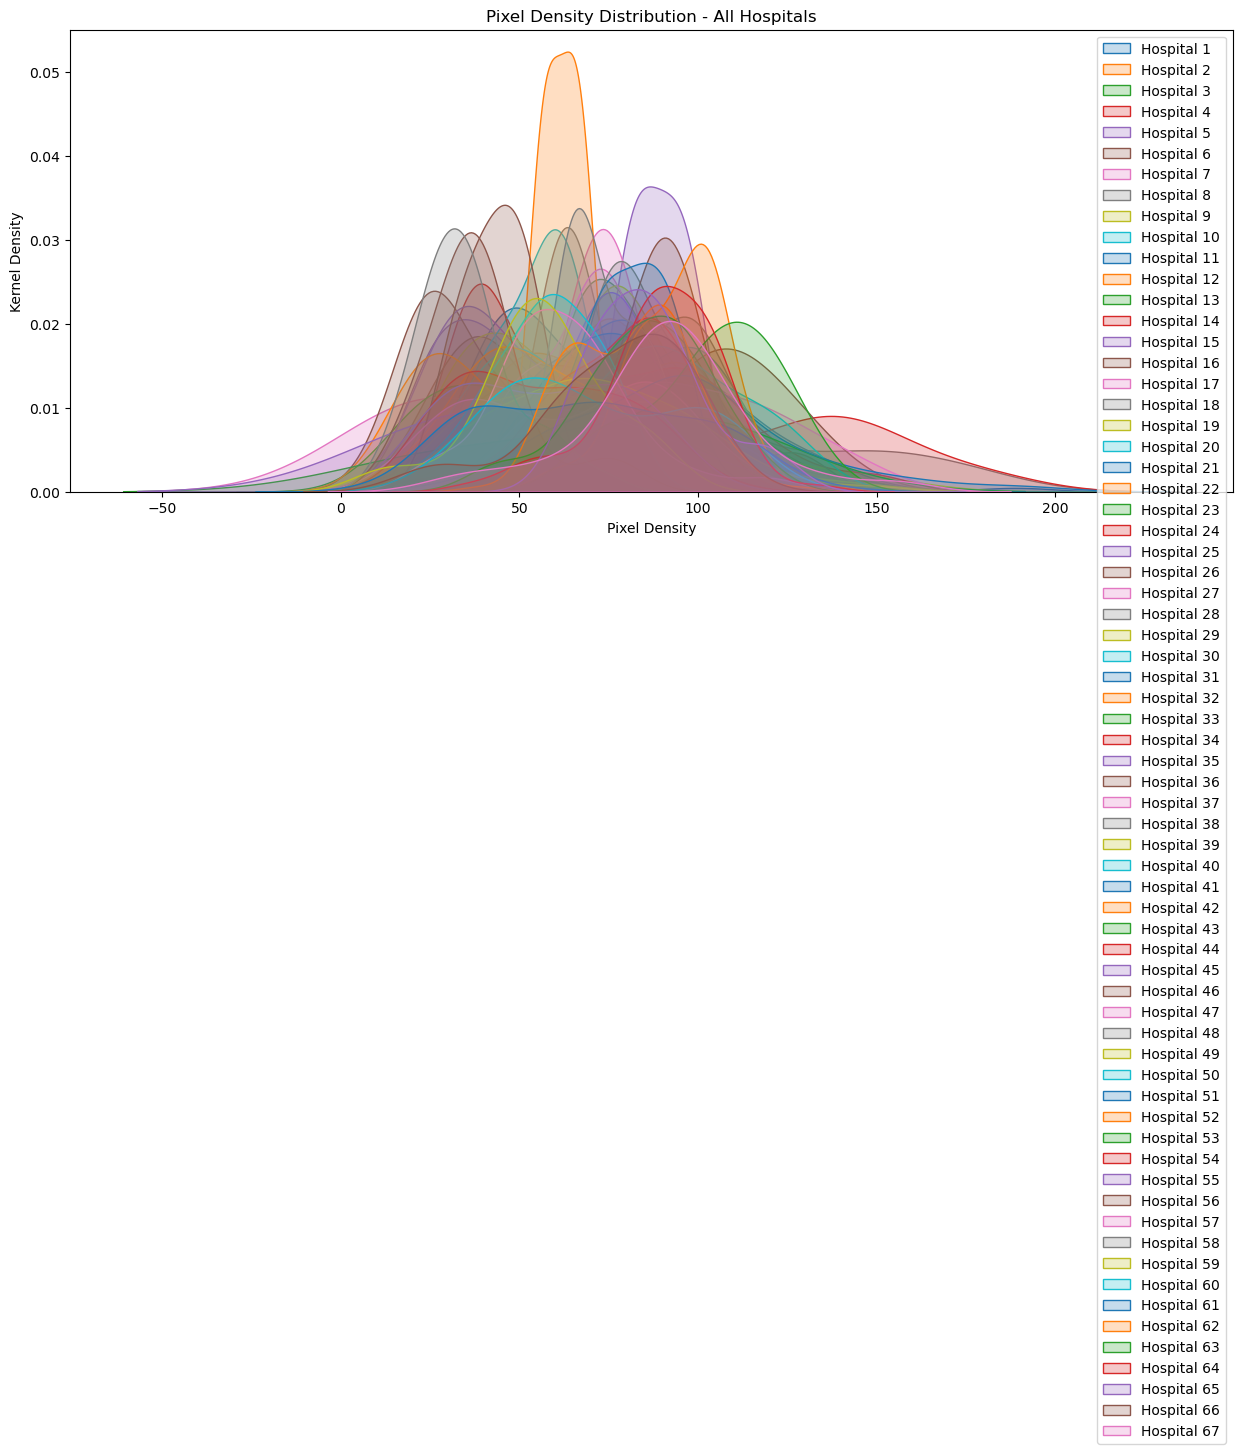

In [2]:
import csv
import os
import pandas as pd
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV files and plot pixel density
csv_folder = '/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/csvFiles'  # Path to the folder containing hospital CSV files

# Get a list of CSV files in the folder
csv_files = [os.path.join(csv_folder, file) for file in os.listdir(csv_folder) if file.endswith('.csv')]

# Define colors for plotting (suitable for scientific papers)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a single set of axes
fig, ax = plt.subplots(figsize=(15, 6))

# Plot pixel density for each hospital in the same plot
for idx, csv_file_path in enumerate(csv_files):
    data = pd.read_csv(csv_file_path)
    pixel_densities = []

    for index, row in data.iterrows():
        image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
        # Read the image
        image = sitk.ReadImage(image_path)
        image_array = sitk.GetArrayFromImage(image)
        # Calculate pixel density (average pixel value) and add it to the list
        pixel_density = image_array.mean()
        pixel_densities.append(pixel_density)

    color_idx = idx % len(colors)  # Ensure color index is within the range of available colors
    sns.kdeplot(pixel_densities, label=f'Hospital {idx + 1}', fill=True, color=colors[color_idx], ax=ax)

ax.set_xlabel('Pixel Density')
ax.set_ylabel('Kernel Density')
ax.set_title('Pixel Density Distribution - All Hospitals')
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# hospital 18 43 55
## pixel density distribution

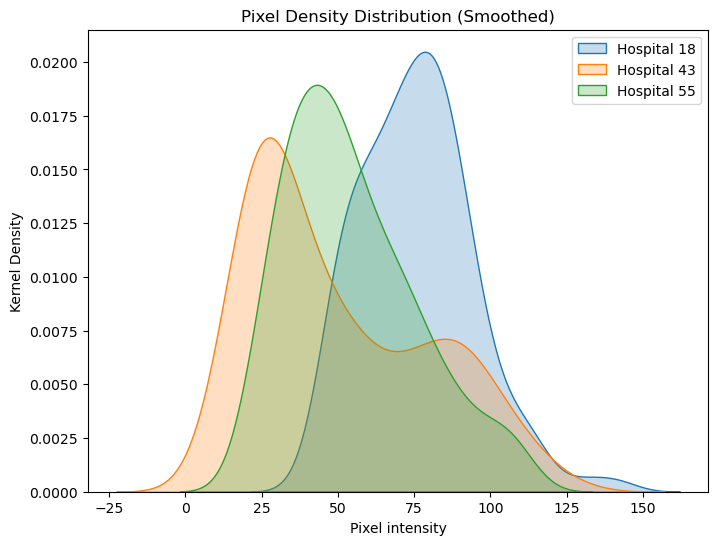

In [1]:
import pandas as pd
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt

# CSV file paths
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/csvFiles/hospital18.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/csvFiles/hospital43.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/csvFiles/hospital55.csv",
]

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
custom_labels = ['Hospital 18', 'Hospital 43', 'Hospital 55']

# Create the figure and axis
plt.figure(figsize=(8, 6))

# Plot kernel density for each hospital
for idx, csv_file_path in enumerate(csv_file_paths):
    data = pd.read_csv(csv_file_path)
    pixel_densities = []

    for index, row in data.iterrows():
        image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
        # Read the image
        image = sitk.ReadImage(image_path)
        image_array = sitk.GetArrayFromImage(image)
        # Calculate pixel density (average pixel value) and add it to the list
        pixel_density = image_array.mean()
        pixel_densities.append(pixel_density)

    # Plot kernel density with fill=True (deprecated shade argument)
    sns.kdeplot(pixel_densities, label=custom_labels[idx], fill=True, color=colors[idx])

plt.xlabel('Pixel intensity')
plt.ylabel('Kernel Density')
plt.title('Pixel Density Distribution (Smoothed)')
plt.legend()
plt.show()


# first order statistics

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


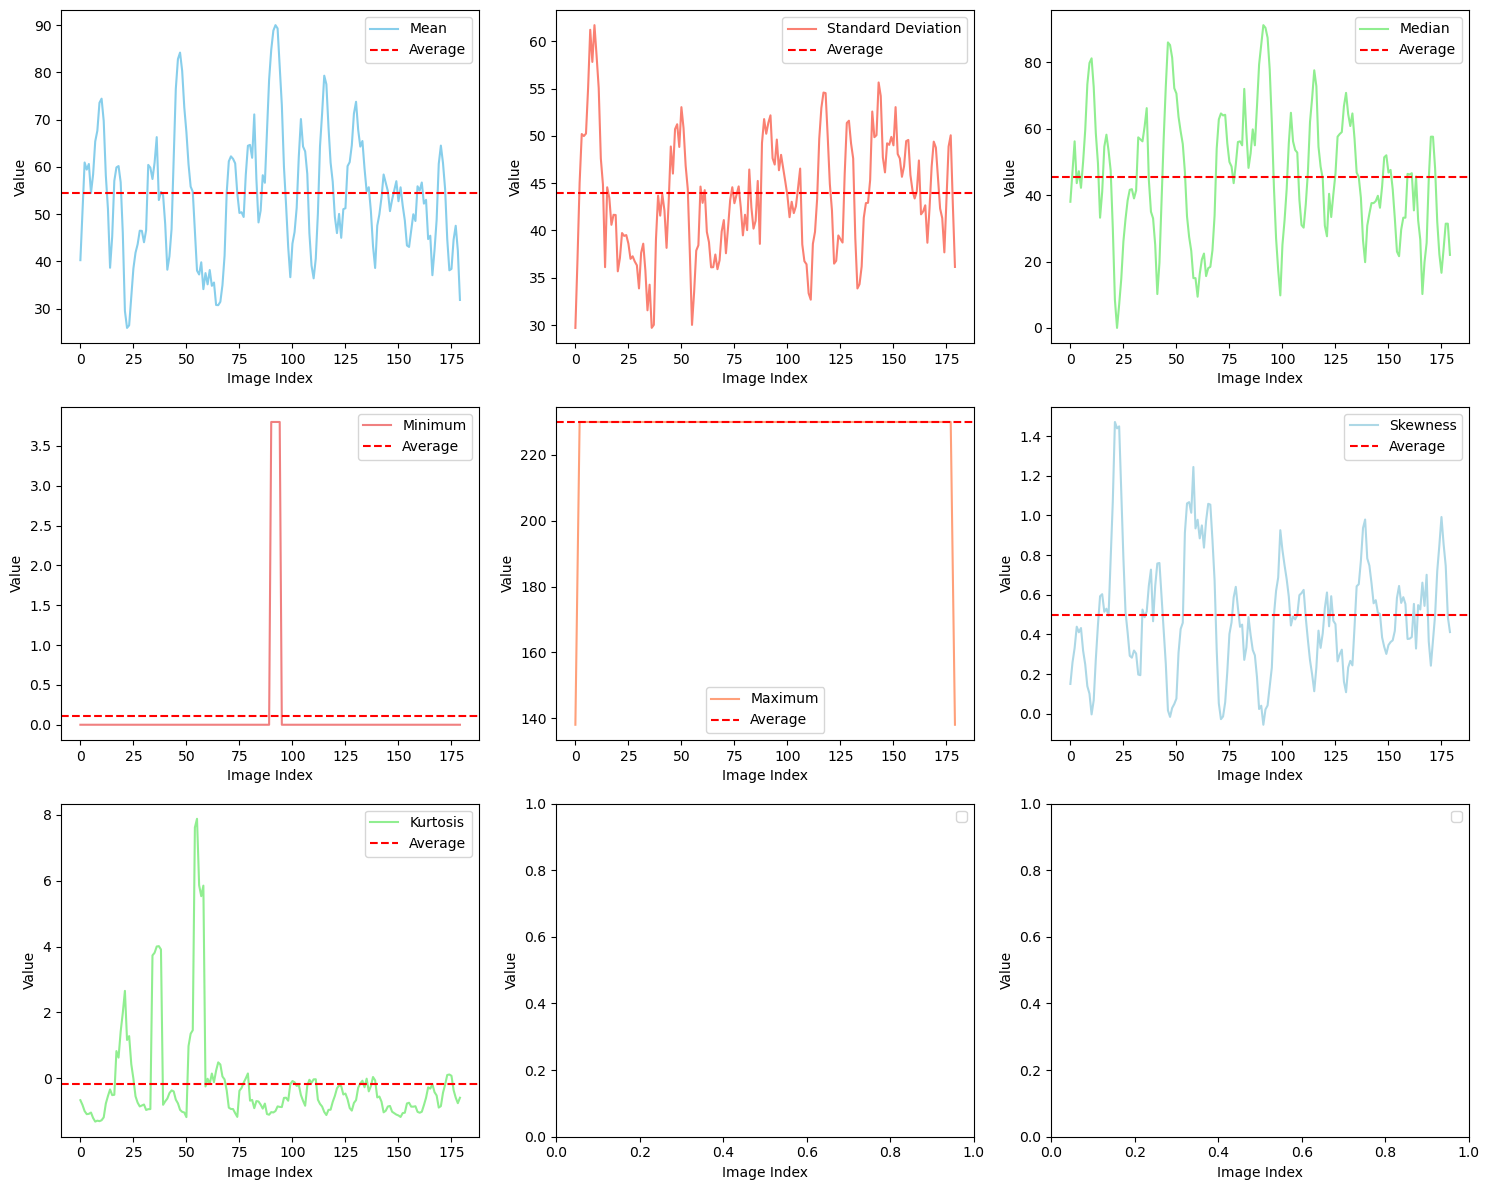

In [6]:
import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# CSV file paths
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/csvFiles/hospital55.csv",
]

# Function to calculate first-order statistics
def calculate_first_order_statistics(image_path):
    # Read the image using SimpleITK
    image = sitk.ReadImage(image_path)
    image_array = sitk.GetArrayFromImage(image)
    
    # Calculate first-order statistics (mean, std, min, max, median, skewness, kurtosis)
    mean_value = np.mean(image_array)
    std_value = np.std(image_array)
    min_value = np.min(image_array)
    max_value = np.max(image_array)
    median_value = np.median(image_array)
    skewness_value = skew(image_array.flatten())
    kurtosis_value = kurtosis(image_array.flatten())
    
    return mean_value, std_value, min_value, max_value, median_value, skewness_value, kurtosis_value

# Lists to store calculated statistics
mean_values = []
std_values = []
min_values = []
max_values = []
median_values = []
skewness_values = []
kurtosis_values = []

# Analyze first-order statistics for images in the CSV files
for csv_file_path in csv_file_paths:
    data = pd.read_csv(csv_file_path)
    for index, row in data.iterrows():
        image_path = row["ImagePath"]  # Modify this column name based on your CSV structure
        
        # Calculate first-order statistics for the current image
        mean_value, std_value, min_value, max_value, median_value, skewness_value, kurtosis_value = calculate_first_order_statistics(image_path)
        
        # Store the calculated statistics in lists
        mean_values.append(mean_value)
        std_values.append(std_value)
        min_values.append(min_value)
        max_values.append(max_value)
        median_values.append(median_value)
        skewness_values.append(skewness_value)
        kurtosis_values.append(kurtosis_value)
        
        # Print or use the calculated statistics as needed
        # print(f"Statistics for {image_path}:")
        # print(f"Mean: {mean_value}")
        # print(f"Standard Deviation: {std_value}")
        # print(f"Minimum Pixel Value: {min_value}")
        # print(f"Maximum Pixel Value: {max_value}")
        # print(f"Median Pixel Value: {median_value}")
        # print(f"Skewness: {skewness_value}")
        # print(f"Kurtosis: {kurtosis_value}")
        # print("-" * 50)

# Calculate Averages for each set of statistics
mean_mean_value = np.mean(mean_values)
mean_std_value = np.mean(std_values)
mean_min_value = np.mean(min_values)
mean_max_value = np.mean(max_values)
mean_median_value = np.mean(median_values)
mean_skewness_value = np.mean(skewness_values)
mean_kurtosis_value = np.mean(kurtosis_values)

# Apply moving averages to smooth the plotted values
window_size = 5  # You can adjust this value for more or less smoothing
mean_values_smoothed = np.convolve(mean_values, np.ones(window_size)/window_size, mode='same')
std_values_smoothed = np.convolve(std_values, np.ones(window_size)/window_size, mode='same')
min_values_smoothed = np.convolve(min_values, np.ones(window_size)/window_size, mode='same')
max_values_smoothed = np.convolve(max_values, np.ones(window_size)/window_size, mode='same')
median_values_smoothed = np.convolve(median_values, np.ones(window_size)/window_size, mode='same')
skewness_values_smoothed = np.convolve(skewness_values, np.ones(window_size)/window_size, mode='same')
kurtosis_values_smoothed = np.convolve(kurtosis_values, np.ones(window_size)/window_size, mode='same')

# Plot the smoothed statistics as curves with Average lines
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes[0, 0].plot(mean_values_smoothed, color='skyblue', label='Mean')
axes[0, 0].axhline(y=mean_mean_value, color='r', linestyle='--', label='Average')
axes[0, 1].plot(std_values_smoothed, color='salmon', label='Standard Deviation')
axes[0, 1].axhline(y=mean_std_value, color='r', linestyle='--', label='Average')
axes[0, 2].plot(median_values_smoothed, color='lightgreen', label='Median')
axes[0, 2].axhline(y=mean_median_value, color='r', linestyle='--', label='Average')
axes[1, 0].plot(min_values_smoothed, color='lightcoral', label='Minimum')
axes[1, 0].axhline(y=mean_min_value, color='r', linestyle='--', label='Average')
axes[1, 1].plot(max_values_smoothed, color='lightsalmon', label='Maximum')
axes[1, 1].axhline(y=mean_max_value, color='r', linestyle='--', label='Average')
axes[1, 2].plot(skewness_values_smoothed, color='lightblue', label='Skewness')
axes[1, 2].axhline(y=mean_skewness_value, color='r', linestyle='--', label='Average')
axes[2, 0].plot(kurtosis_values_smoothed, color='lightgreen', label='Kurtosis')
axes[2, 0].axhline(y=mean_kurtosis_value, color='r', linestyle='--', label='Average')

for ax in axes.flat:
    ax.set_xlabel('Image Index')
    ax.set_ylabel('Value')
    ax.legend()

plt.tight_layout()
plt.show()


# all features extractor

In [36]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital43"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospital43_features.csv', index=False)


# Non normalization feature extractor

In [ ]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital18"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(image, mask)  # Pass both image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# # Print or save the extracted features as needed
# print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/hospital55_features.csv', index=False)


# Normalization feature extractor Hospital 18

In [ ]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital18"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor for 2D images
extractor = featureextractor.RadiomicsFeatureExtractor(shape2D=True)

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Perform normalization (scaling pixel values to [0, 1] range)
        image_array = sitk.GetArrayFromImage(image)
        normalized_image_array = (image_array - image_array.min()) / (image_array.max() - image_array.min())
        normalized_image = sitk.GetImageFromArray(normalized_image_array)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(normalized_image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(normalized_image, mask)  # Pass both normalized image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/normal_hospital18_features.csv', index=False)


# Normalization feature extractor Hospital 43

In [ ]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital43"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Perform normalization (scaling pixel values to [0, 1] range)
        image_array = sitk.GetArrayFromImage(image)
        normalized_image_array = (image_array - image_array.min()) / (image_array.max() - image_array.min())
        normalized_image = sitk.GetImageFromArray(normalized_image_array)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(normalized_image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(normalized_image, mask)  # Pass both normalized image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/normal_hospital43_features.csv', index=False)


# Normalization feature extractor Hospital 55

In [ ]:
import os
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor

# Directory containing the images
image_directory = "/local/data1/honzh073/data/hospital55"

# List to store extracted features
extracted_features = []

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate through the image files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".png"):  # Assuming the images are in PNG format
        image_path = os.path.join(image_directory, filename)
        
        # Read the image using SimpleITK
        image = sitk.ReadImage(image_path)
        
        # Perform normalization (scaling pixel values to [0, 1] range)
        image_array = sitk.GetArrayFromImage(image)
        normalized_image_array = (image_array - image_array.min()) / (image_array.max() - image_array.min())
        normalized_image = sitk.GetImageFromArray(normalized_image_array)
        
        # Create a mask where all pixels are set to 1 (same size as the image)
        mask = sitk.Image(normalized_image.GetSize(), sitk.sitkUInt8)
        mask_array = sitk.GetArrayFromImage(mask)
        mask_array[:] = 1
        mask = sitk.GetImageFromArray(mask_array)
        
        # Perform feature extraction (first-order statistics)
        features = extractor.execute(normalized_image, mask)  # Pass both normalized image and mask
        
        # Add the extracted features to the list along with the filename
        features["ImageFilename"] = filename
        extracted_features.append(features)

# Convert the extracted features to a DataFrame
features_df = pd.DataFrame(extracted_features)

# Save the DataFrame to a CSV file
features_df.to_csv('/local/data1/honzh073/local_repository/FL/code/0_image_statsPyradiomics/normal_hospital55_features.csv', index=False)


# Remove columns and add types


In [4]:
import pandas as pd

def process_csv(input_file_path, output_file_path):
    data = pd.read_csv(input_file_path)

    columns_to_remove = [
        'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
        'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings', 
        'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash', 
        'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing', 
        'diagnostics_Image-original_Size', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 
        'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox', 
        'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass',
        'diagnostics_Image-original_Minimum', 'diagnostics_Image-original_Maximum', 
        'diagnostics_Mask-original_VolumeNum', 'original_firstorder_Maximum', 'original_firstorder_Minimum',
        'original_firstorder_Range', 'original_firstorder_Uniformity', 'original_glcm_Autocorrelation', 
        'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 
        'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 
        'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn', 
        'original_glcm_Idn', 'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_InverseVariance', 
        'original_glcm_JointAverage', 'original_glcm_JointEnergy', 'original_glcm_MCC', 
        'original_glcm_MaximumProbability', 'original_glcm_SumAverage', 'original_glcm_SumSquares', 
        'original_gldm_GrayLevelVariance', 'original_gldm_HighGrayLevelEmphasis', 'original_gldm_LowGrayLevelEmphasis', 
        'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glrlm_GrayLevelVariance', 
        'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis', 
        'original_glszm_GrayLevelNonUniformity', 'original_glszm_GrayLevelNonUniformityNormalized', 
        'original_glszm_GrayLevelVariance', 'original_glszm_HighGrayLevelZoneEmphasis', 
        'original_glszm_LowGrayLevelZoneEmphasis', 'original_glszm_SizeZoneNonUniformity', 
        'original_glszm_SizeZoneNonUniformityNormalized', 'original_glszm_ZoneVariance', 
        'original_ngtdm_Busyness', 'original_ngtdm_Complexity', 'original_ngtdm_Contrast', 
        'original_ngtdm_Strength','original_glcm_DifferenceEntropy','original_glcm_JointEntropy','original_glcm_SumEntropy','original_firstorder_Entropy','original_glszm_ZoneEntropy','original_ngtdm_Coarseness'
        ,'original_glszm_ZoneEntropy','original_glszm_SmallAreaEmphasis','original_glszm_SmallAreaHighGrayLevelEmphasis','original_glszm_SmallAreaLowGrayLevelEmphasis','original_glszm_ZonePercentage'
    ]

    # drop columns above
    data_cleaned = data.drop(columns=columns_to_remove)

    # add Type
    def determine_type(image_filename):
        if "AFF" in image_filename:
            return 1
        elif "NFF" in image_filename:
            return 0
        else:
            return None

    data_cleaned['Type'] = data_cleaned['ImageFilename'].apply(determine_type)

    data_cleaned.to_csv(output_file_path, index=False)

input_file_path = "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital43_features.csv"
output_file_path = "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/clean_43_types.csv"

process_csv(input_file_path, output_file_path)

# remove filenames

data = pd.read_csv(output_file_path)
data_cleaned = data.drop(columns='ImageFilename')
data_cleaned.to_csv(output_file_path, index=False)


# extract features mean and sd

In [5]:
import pandas as pd

# read csv files
file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/clean_18_types.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/clean_43_types.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/clean_55_types.csv"
]

# result df
result_df = pd.DataFrame()

# calculate column's mean and sd, add to result_df
for file_path in file_paths:
    data = pd.read_csv(file_path)
    # exclude columns
    relevant_columns = data.columns[:-2]
    column_means = data[relevant_columns].mean()
    column_std_devs = data[relevant_columns].std()
    temp_df = pd.DataFrame({"Column Name": column_means.index, "Mean": column_means.values, "Standard Deviation": column_std_devs.values})
    # concat by column
    result_df = pd.concat([result_df, temp_df], axis=1)

result_df.to_csv("/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/mean_std_results.csv", index=False)


# plot mean and sd values of different hospital

Unique values in 'Column Name' column:
['diagnostics_Image-original_Mean' 'diagnostics_Mask-original_VoxelNum'
 'original_firstorder_10Percentile' 'original_firstorder_90Percentile'
 'original_firstorder_Energy' 'original_firstorder_InterquartileRange'
 'original_firstorder_Kurtosis'
 'original_firstorder_MeanAbsoluteDeviation' 'original_firstorder_Mean'
 'original_firstorder_Median'
 'original_firstorder_RobustMeanAbsoluteDeviation'
 'original_firstorder_RootMeanSquared' 'original_firstorder_Skewness'
 'original_firstorder_TotalEnergy' 'original_firstorder_Variance'
 'original_gldm_DependenceEntropy' 'original_gldm_DependenceNonUniformity'
 'original_gldm_DependenceNonUniformityNormalized'
 'original_gldm_DependenceVariance' 'original_gldm_GrayLevelNonUniformity'
 'original_gldm_LargeDependenceEmphasis'
 'original_gldm_LargeDependenceHighGrayLevelEmphasis'
 'original_gldm_LargeDependenceLowGrayLevelEmphasis'
 'original_gldm_SmallDependenceEmphasis'
 'original_gldm_SmallDependenceHighG

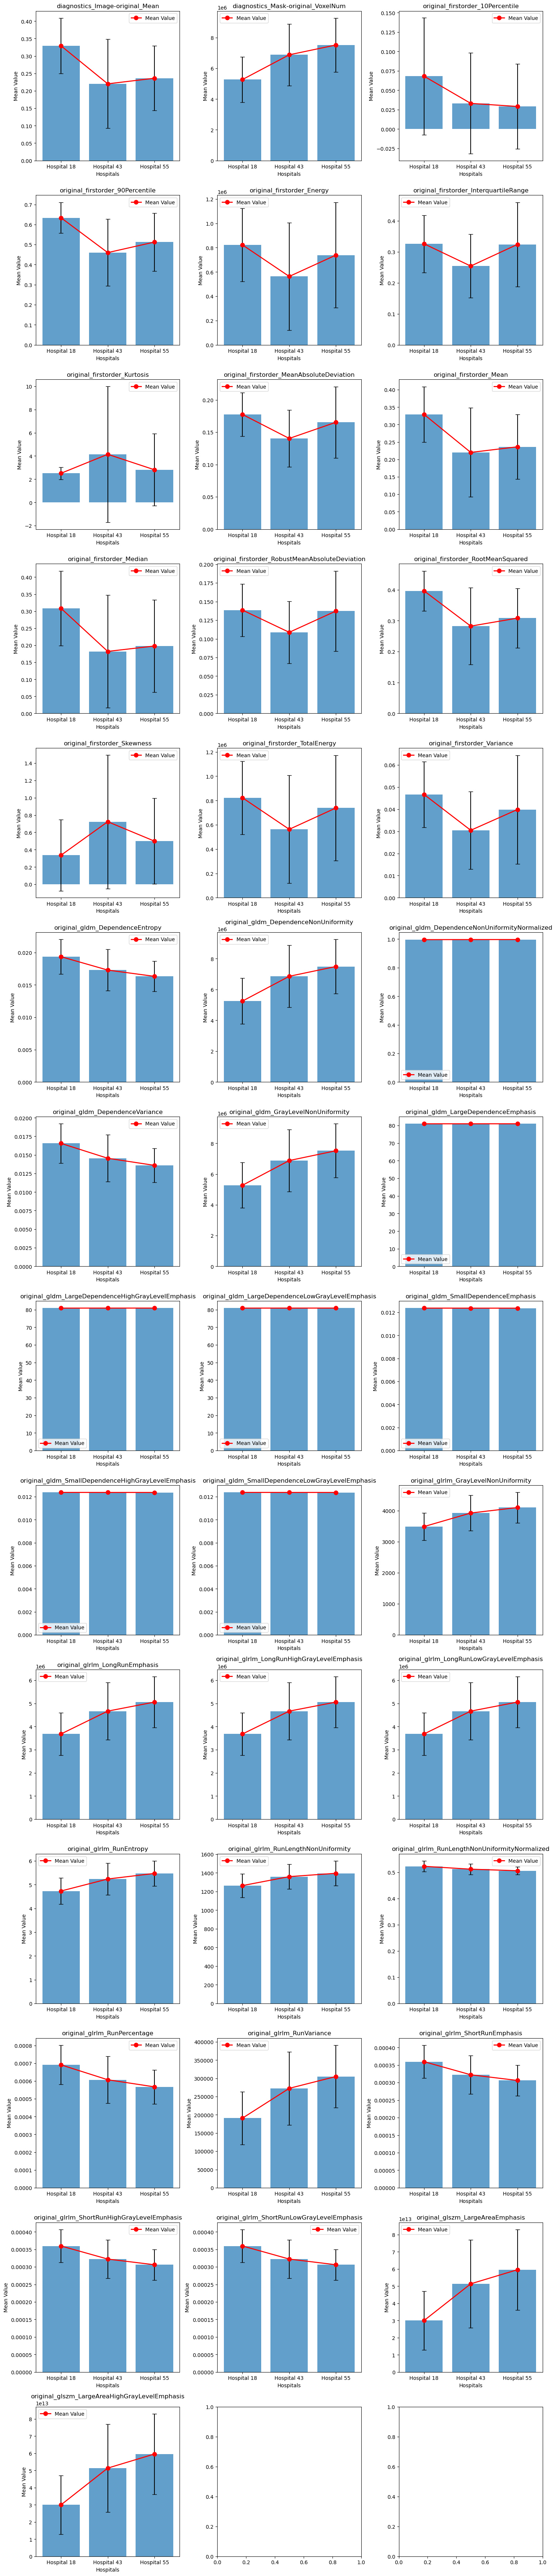

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/mean_std_results.csv"
data = pd.read_csv(csv_file_path)

# features to plot
columns_to_plot = ['diagnostics_Image-original_Mean','diagnostics_Mask-original_VoxelNum',
 'original_firstorder_10Percentile', 'original_firstorder_90Percentile',
 'original_firstorder_Energy', 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean',
 'original_firstorder_Median',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
 'original_firstorder_TotalEnergy' ,'original_firstorder_Variance',
 'original_gldm_DependenceEntropy' ,'original_gldm_DependenceNonUniformity',
 'original_gldm_DependenceNonUniformityNormalized',
 'original_gldm_DependenceVariance' ,'original_gldm_GrayLevelNonUniformity',
 'original_gldm_LargeDependenceEmphasis',
 'original_gldm_LargeDependenceHighGrayLevelEmphasis',
 'original_gldm_LargeDependenceLowGrayLevelEmphasis',
 'original_gldm_SmallDependenceEmphasis',
 'original_gldm_SmallDependenceHighGrayLevelEmphasis',
 'original_gldm_SmallDependenceLowGrayLevelEmphasis',
 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_LongRunEmphasis',
 'original_glrlm_LongRunHighGrayLevelEmphasis',
 'original_glrlm_LongRunLowGrayLevelEmphasis' ,'original_glrlm_RunEntropy',
 'original_glrlm_RunLengthNonUniformity',
 'original_glrlm_RunLengthNonUniformityNormalized',
 'original_glrlm_RunPercentage','original_glrlm_RunVariance',
 'original_glrlm_ShortRunEmphasis',
 'original_glrlm_ShortRunHighGrayLevelEmphasis',
 'original_glrlm_ShortRunLowGrayLevelEmphasis',
 'original_glszm_LargeAreaEmphasis',
 'original_glszm_LargeAreaHighGrayLevelEmphasis']


# prints unique values in 'Column Name' column for debugging
# print("Unique values in 'Column Name' column:")
# print(data['Column Name'].unique())
# plots row and column number
num_features = len(columns_to_plot)
num_cols = 3  # 3 column
num_rows = (num_features + num_cols - 1) // num_cols  # row number

# subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# bar and line chart 
for idx, feature in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    hospital_18_mean = data['Hospital 18 Mean'][data['Column Name'] == feature].values[0]
    hospital_18_std = data['Hospital 18 Standard Deviation'][data['Column Name'] == feature].values[0]
    hospital_43_mean = data['Hospital 43 Mean'][data['Column Name'] == feature].values[0]
    hospital_43_std = data['Hospital 43 Standard Deviation'][data['Column Name'] == feature].values[0]
    hospital_55_mean = data['Hospital 55 Mean'][data['Column Name'] == feature].values[0]
    hospital_55_std = data['Hospital 55 Standard Deviation'][data['Column Name'] == feature].values[0]
    
    # bar
    axs[row_idx, col_idx].bar(['Hospital 18', 'Hospital 43', 'Hospital 55'], [hospital_18_mean, hospital_43_mean, hospital_55_mean],
                              yerr=[hospital_18_std, hospital_43_std, hospital_55_std], alpha=0.7, capsize=4)
    
    # line
    axs[row_idx, col_idx].plot(['Hospital 18', 'Hospital 43', 'Hospital 55'], [hospital_18_mean, hospital_43_mean, hospital_55_mean],
                               marker='o', color='r', linewidth=2, markersize=8, label='Mean Value')
    
    # title label legend
    axs[row_idx, col_idx].set_title(feature)
    axs[row_idx, col_idx].set_ylabel('Mean Value')
    axs[row_idx, col_idx].set_xlabel('Hospitals')
    axs[row_idx, col_idx].legend()
    
# adjust layout
plt.tight_layout()

plt.show()


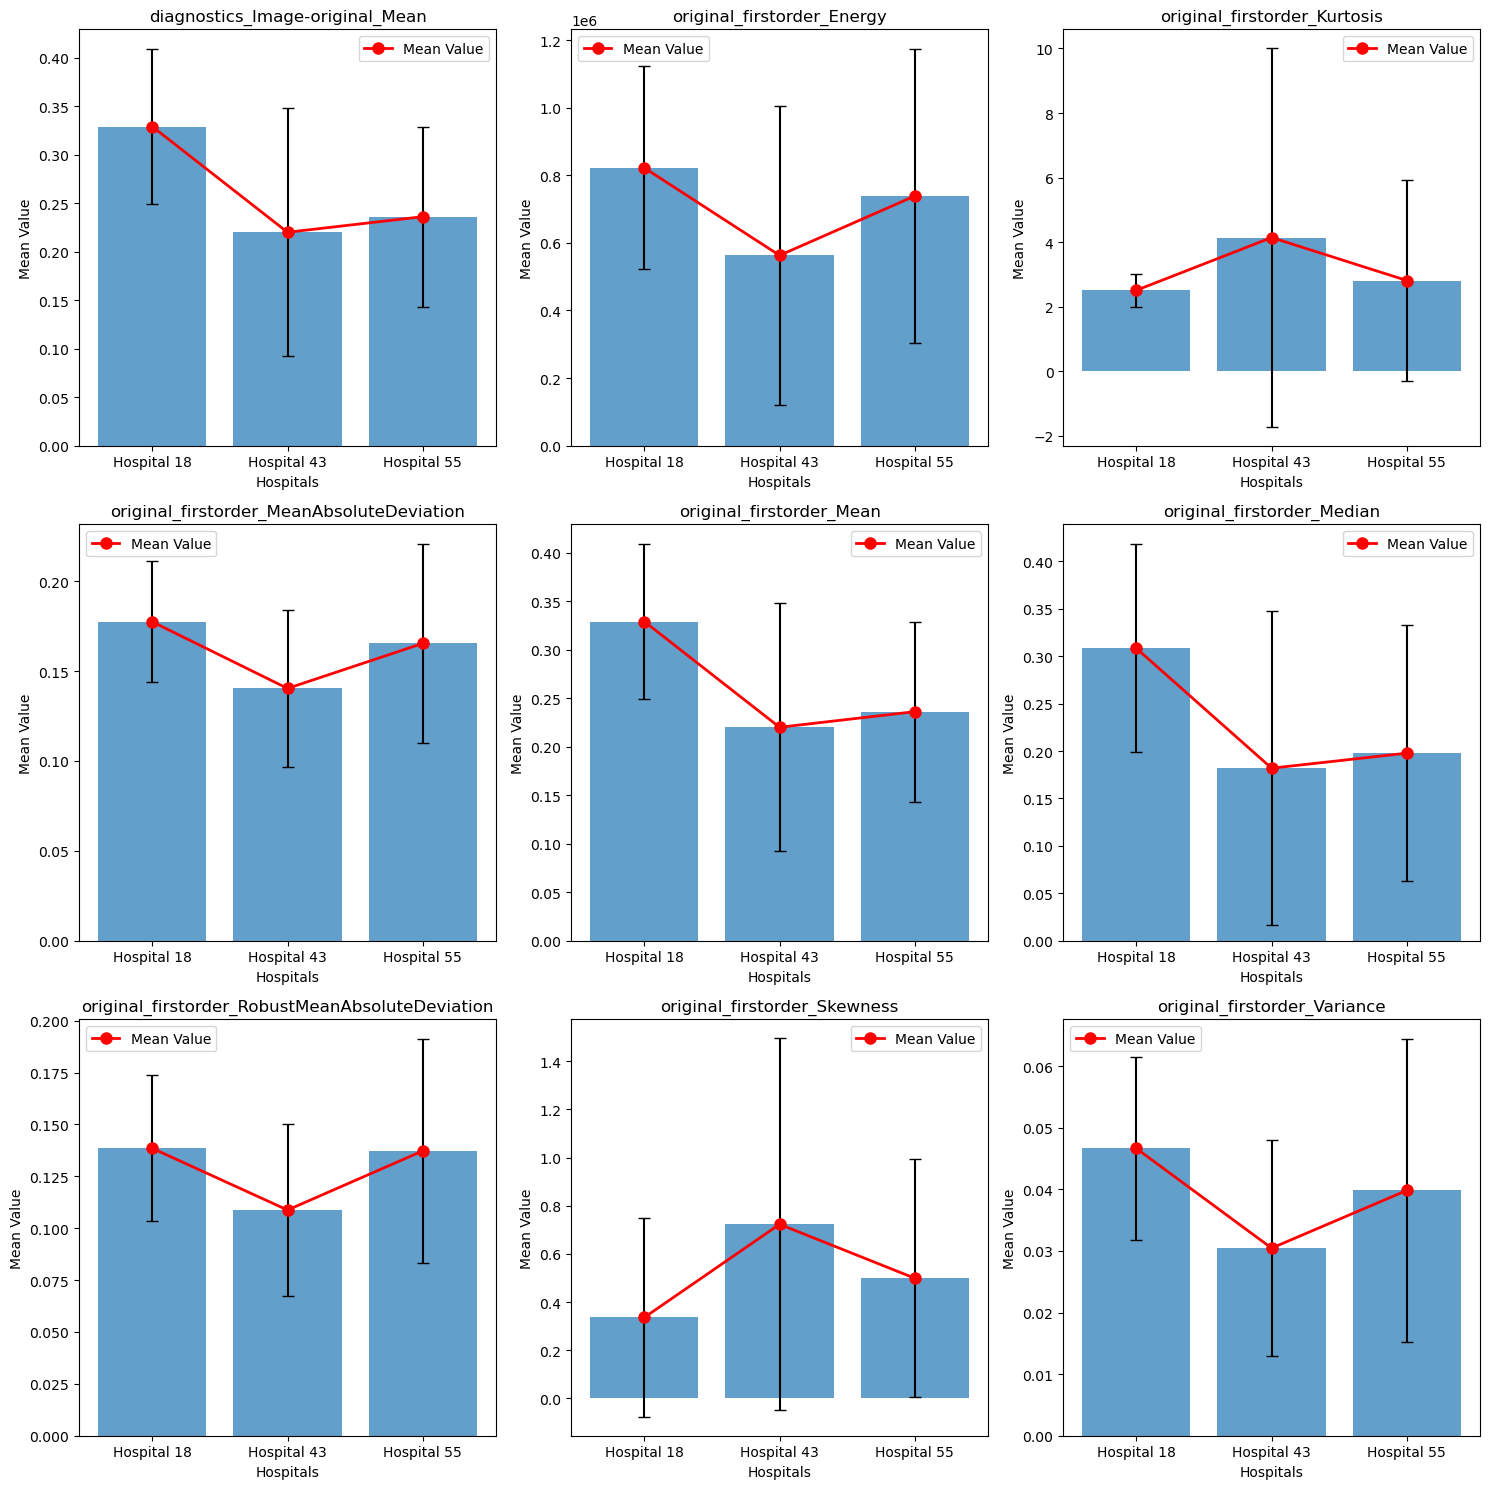

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv
csv_file_path = "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/mean_std_results.csv"
data = pd.read_csv(csv_file_path)

# features to plot
columns_to_plot = ['diagnostics_Image-original_Mean',
 'original_firstorder_Energy', 
 'original_firstorder_Kurtosis',
 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean',
 'original_firstorder_Median',
 'original_firstorder_RobustMeanAbsoluteDeviation',
  'original_firstorder_Skewness', 'original_firstorder_Variance']


# prints unique values in 'Column Name' column for debugging
# print("Unique values in 'Column Name' column:")
# print(data['Column Name'].unique())
# plots row and column number
num_features = len(columns_to_plot)
num_cols = 3  # 3 column
num_rows = (num_features + num_cols - 1) // num_cols  # row number

# subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# bar and line chart 
for idx, feature in enumerate(columns_to_plot):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    hospital_18_mean = data['Hospital 18 Mean'][data['Column Name'] == feature].values[0]
    hospital_18_std = data['Hospital 18 Standard Deviation'][data['Column Name'] == feature].values[0]
    hospital_43_mean = data['Hospital 43 Mean'][data['Column Name'] == feature].values[0]
    hospital_43_std = data['Hospital 43 Standard Deviation'][data['Column Name'] == feature].values[0]
    hospital_55_mean = data['Hospital 55 Mean'][data['Column Name'] == feature].values[0]
    hospital_55_std = data['Hospital 55 Standard Deviation'][data['Column Name'] == feature].values[0]
    
    # bar
    axs[row_idx, col_idx].bar(['Hospital 18', 'Hospital 43', 'Hospital 55'], [hospital_18_mean, hospital_43_mean, hospital_55_mean],
                              yerr=[hospital_18_std, hospital_43_std, hospital_55_std], alpha=0.7, capsize=4)
    
    # line
    axs[row_idx, col_idx].plot(['Hospital 18', 'Hospital 43', 'Hospital 55'], [hospital_18_mean, hospital_43_mean, hospital_55_mean],
                               marker='o', color='r', linewidth=2, markersize=8, label='Mean Value')
    
    # title label legend
    axs[row_idx, col_idx].set_title(feature)
    axs[row_idx, col_idx].set_ylabel('Mean Value')
    axs[row_idx, col_idx].set_xlabel('Hospitals')
    axs[row_idx, col_idx].legend()
    
# adjust layout
plt.tight_layout()

plt.show()


# correlation


In [15]:
import pandas as pd

# 读取数据
data = pd.read_csv("/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/clean_43_types.csv")

# 计算相关性系数
correlation_matrix = data.corr()

# 打印相关性系数矩阵
print("Correlation Matrix:")
print(correlation_matrix)

# 如果你只关心某个特定变量与其他变量的相关性，可以单独提取该列的相关性系数
specific_variable_correlation = correlation_matrix['Type']
print("\nCorrelation with 'Type':")
print(specific_variable_correlation)


Correlation Matrix:
                                                    diagnostics_Image-original_Mean  \
diagnostics_Image-original_Mean                                            1.000000   
diagnostics_Mask-original_VoxelNum                                        -0.596435   
original_firstorder_10Percentile                                           0.764291   
original_firstorder_90Percentile                                           0.926573   
original_firstorder_Energy                                                 0.830247   
original_firstorder_InterquartileRange                                     0.553568   
original_firstorder_Kurtosis                                              -0.334010   
original_firstorder_MeanAbsoluteDeviation                                  0.611364   
original_firstorder_Mean                                                   1.000000   
original_firstorder_Median                                                 0.974660   
original_firstorder_Rob

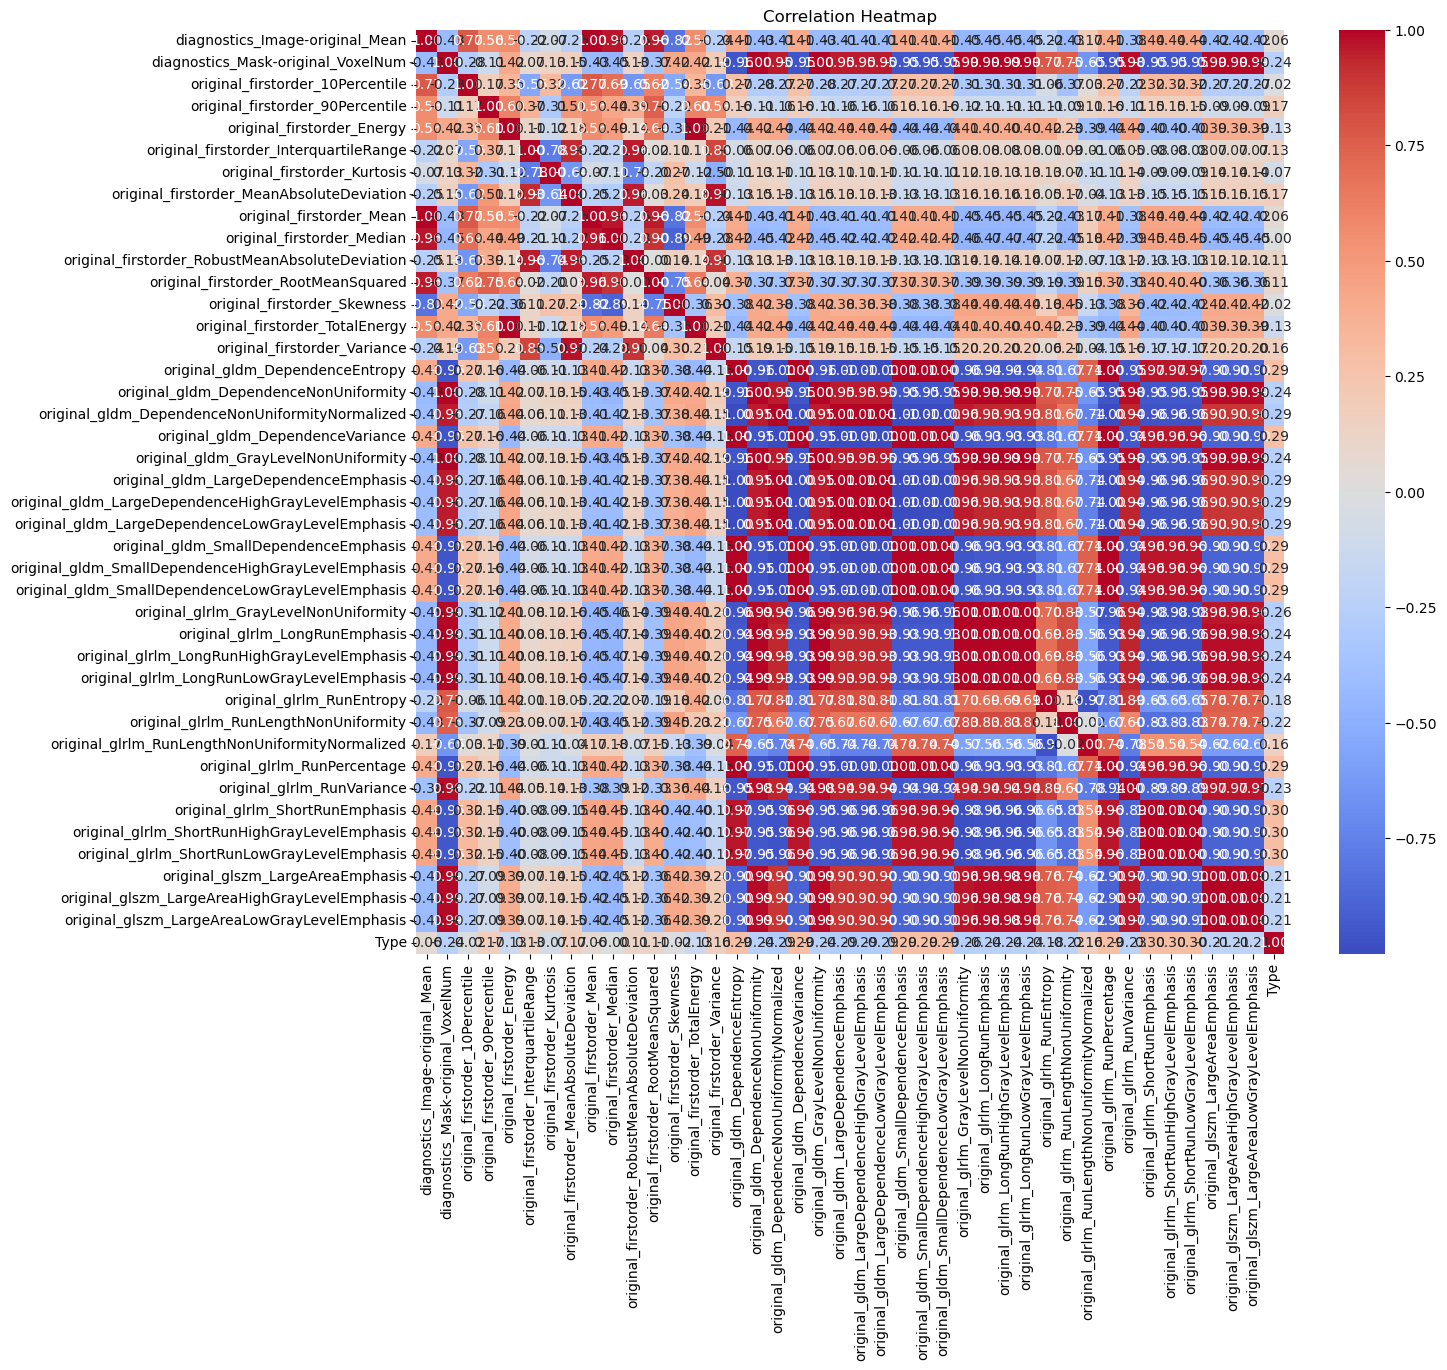

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/clean_18_types.csv")

# 计算相关性系数
correlation_matrix = data.corr()

# 绘制相关性热力图
plt.figure(figsize=(14, 12))  # Set the figure size (width, height)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# hospital 43 as example

<Figure size 1200x1000 with 0 Axes>

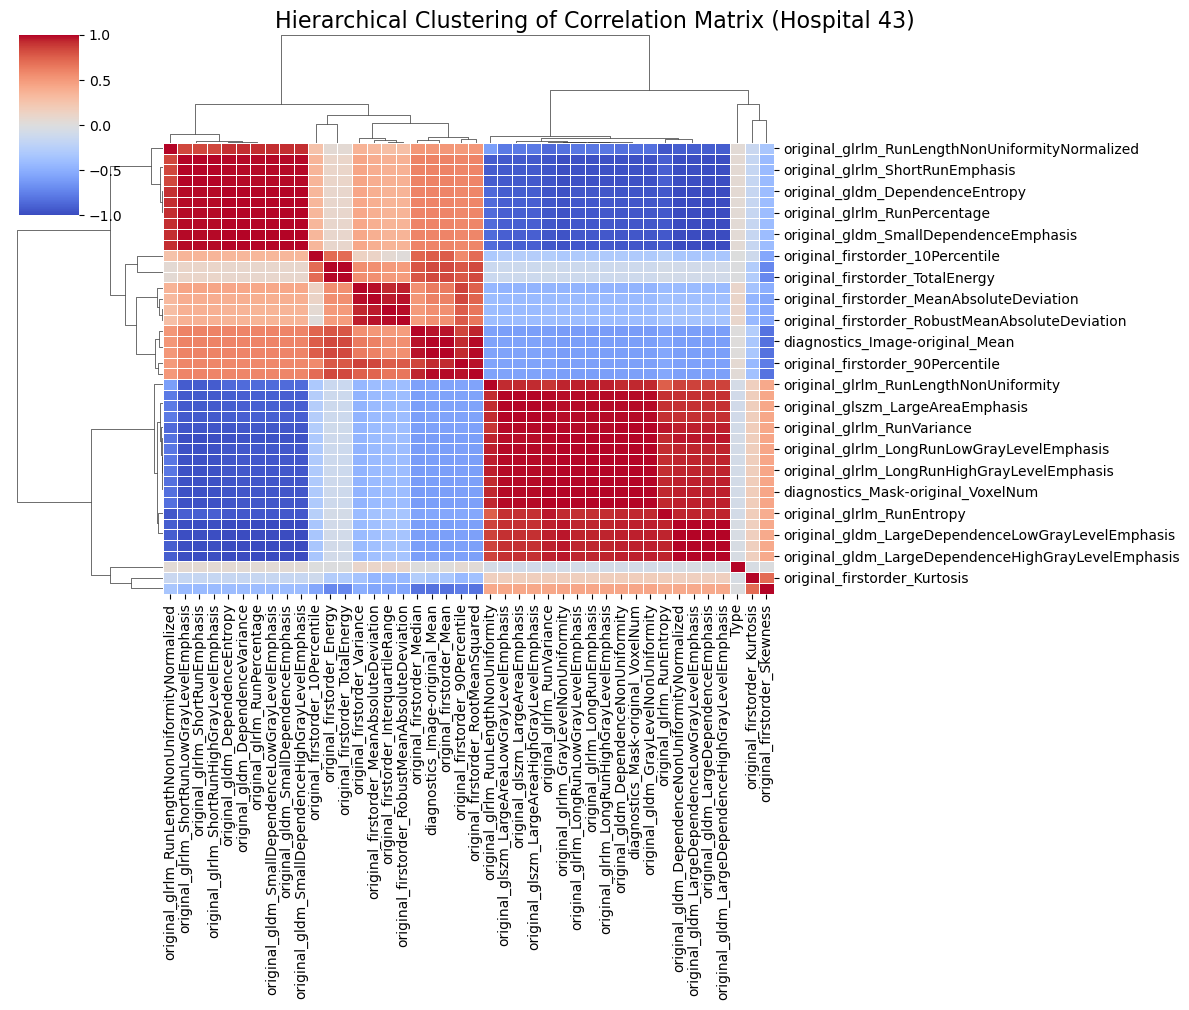

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据
data = pd.read_csv("/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/clean_43_types.csv")

# 计算相关性系数
correlation_matrix = data.corr()

# 绘制树状的相关性热力图，不显示数值标签
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=.5, figsize=(12, 10))
plt.suptitle('Hierarchical Clustering of Correlation Matrix (Hospital 43)', fontsize=16, y=1.005)  # 设置标题并调整位置
plt.show()


# brightness, contrast, skewness, and kurtosis

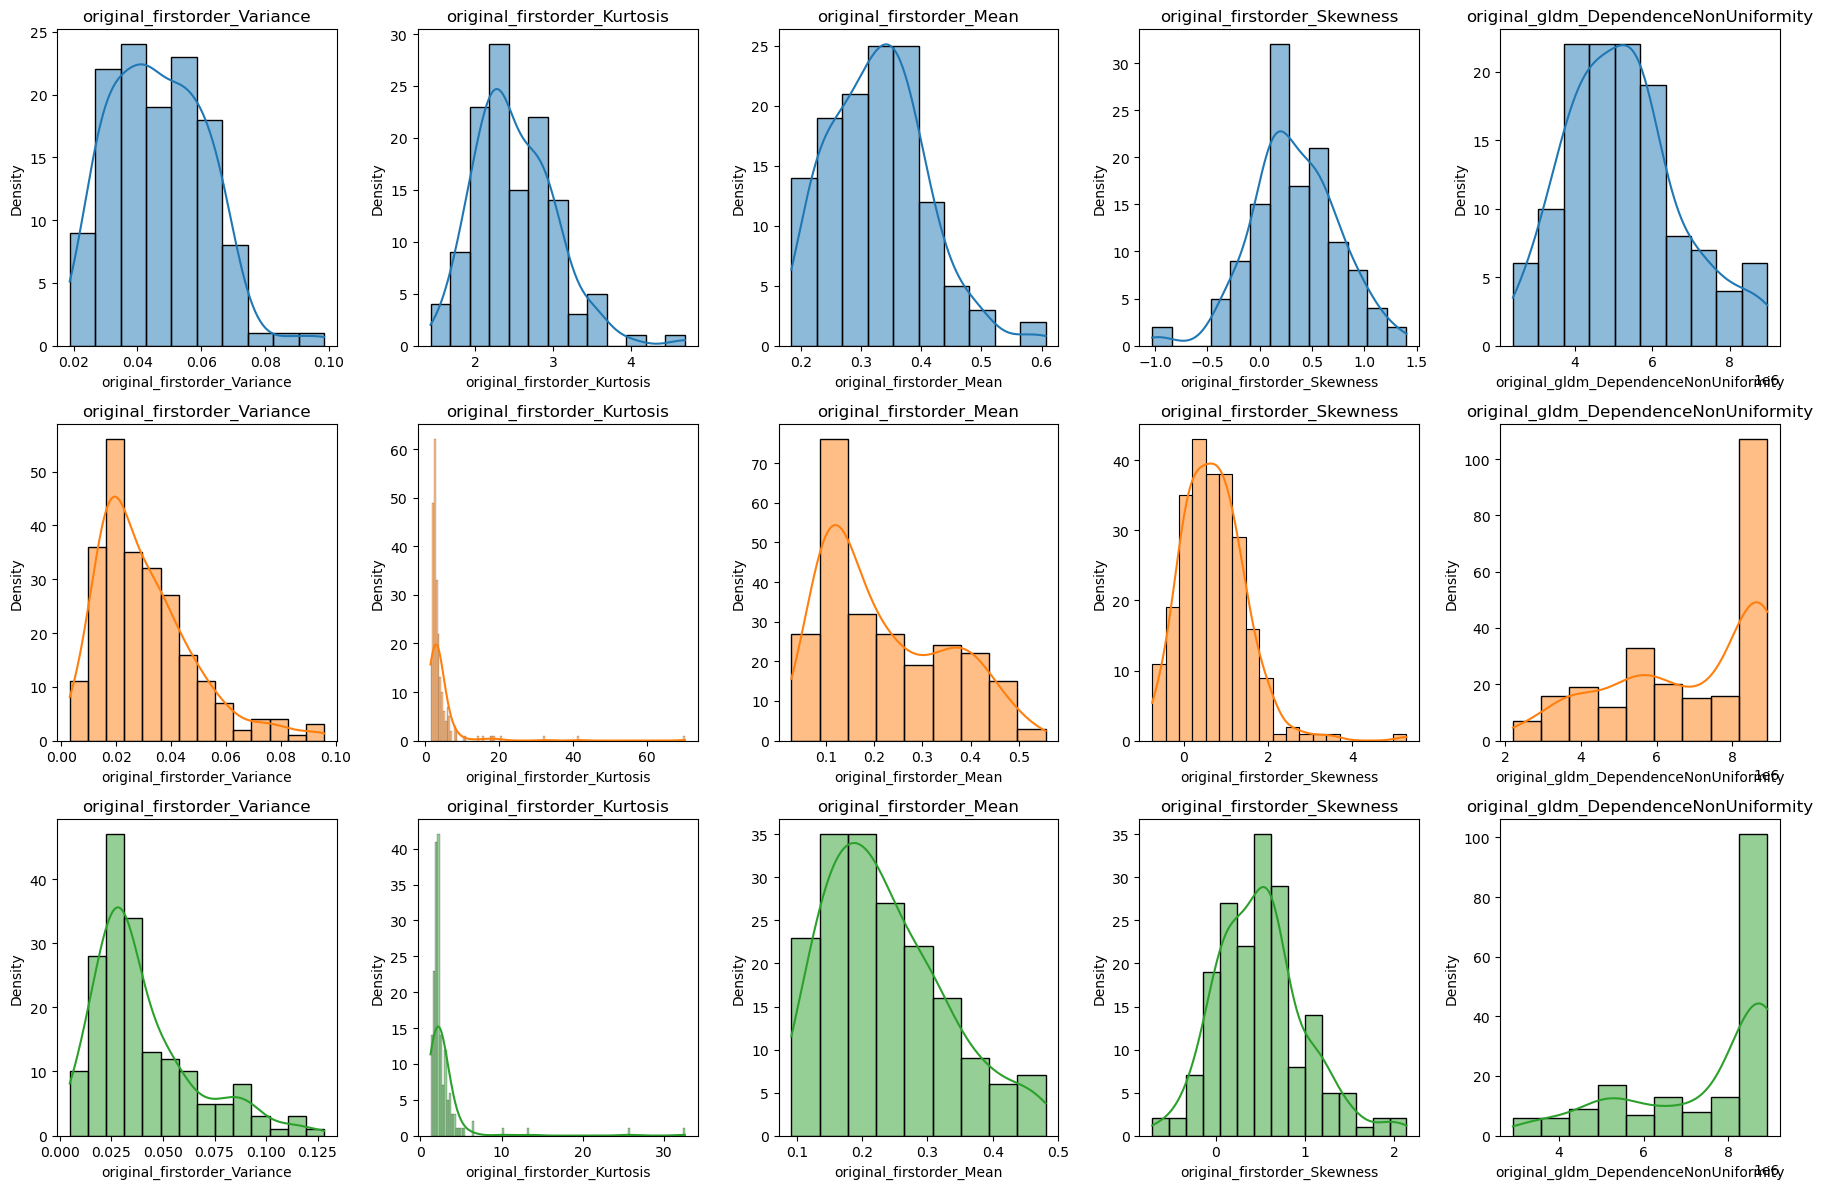

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV文件路径
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital18_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital43_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital55_features.csv"
]

# 要绘制的特征列
feature_columns = [
    'original_firstorder_Variance',
    'original_firstorder_Kurtosis',
    'original_firstorder_Mean',
    'original_firstorder_Skewness',
    'original_gldm_DependenceNonUniformity'
]

# 创建画布和子图
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(18, 12))

# 遍历每个CSV文件，绘制特征分布图
for idx, csv_file_path in enumerate(csv_file_paths):
    # 读取CSV文件中的特定特征列
    data = pd.read_csv(csv_file_path, usecols=feature_columns)
    
    # 绘制特征的分布图
    for i, feature in enumerate(feature_columns):
        plt.subplot(3, len(feature_columns), i + 1 + idx * len(feature_columns))
        sns.histplot(data[feature], kde=True, color=colors[idx])
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.title(f'{feature}')

plt.tight_layout()
plt.show()


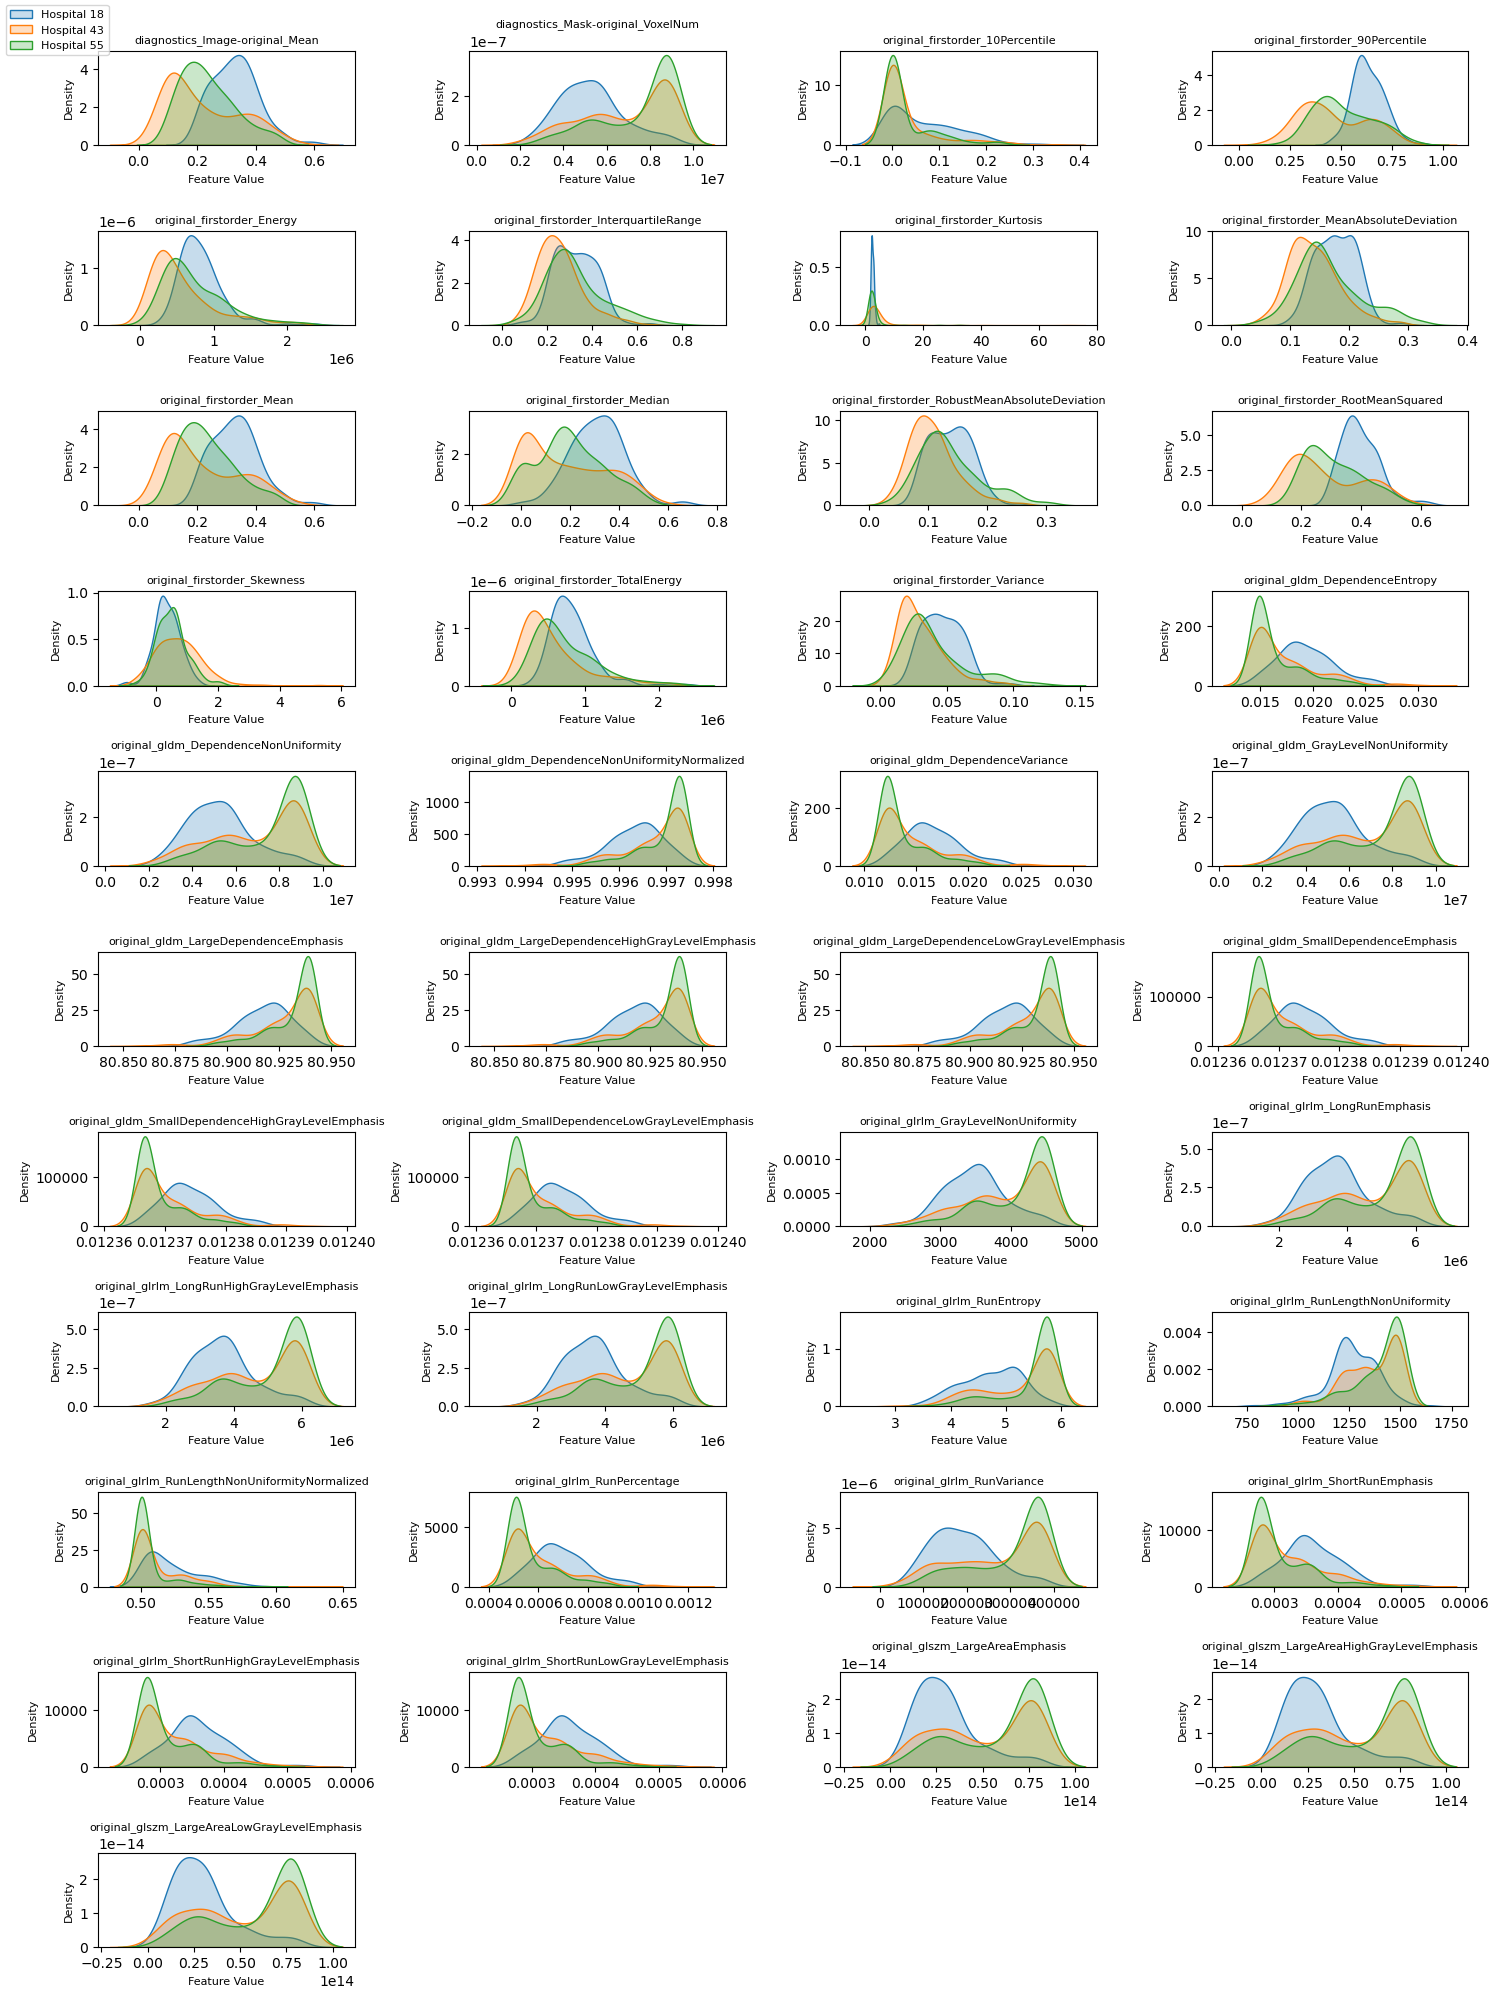

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV文件路径
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital18_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital43_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital55_features.csv"
]

# 要绘制的特征列
feature_columns = [
    'diagnostics_Image-original_Mean',
    'diagnostics_Mask-original_VoxelNum',
    'original_firstorder_10Percentile',
    'original_firstorder_90Percentile',
    'original_firstorder_Energy',
    'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis',
    'original_firstorder_MeanAbsoluteDeviation',
    'original_firstorder_Mean',
    'original_firstorder_Median',
    'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared',
    'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy',
    'original_firstorder_Variance',
    'original_gldm_DependenceEntropy',
    'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized',
    'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity',
    'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis',
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'original_glszm_LargeAreaEmphasis',
    'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_glszm_LargeAreaLowGrayLevelEmphasis'
]
# 创建子图
num_features = len(feature_columns)
num_hospitals = len(csv_file_paths)
num_cols = 4  # 每行的子图数量
num_rows = (num_features + num_cols - 1) // num_cols  # 计算需要的行数

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# 自定义医院标签
hospital_labels = ['Hospital 18', 'Hospital 43', 'Hospital 55']

# 遍历每个特征，绘制平滑曲线
for i, feature in enumerate(feature_columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].set_title(feature, fontsize = 8)
    axs[row_idx, col_idx].set_xlabel('Feature Value', fontsize = 8)
    axs[row_idx, col_idx].set_ylabel('Density', fontsize = 8)

    for j, csv_file_path in enumerate(csv_file_paths):
        # 读取CSV文件中的特定特征列
        data = pd.read_csv(csv_file_path, usecols=[feature])
        # 绘制当前特征的平滑曲线
        sns.kdeplot(data[feature], ax=axs[row_idx, col_idx], fill=True, label=hospital_labels[j], linewidth=1)

# 删除多余的子图
for i in range(len(feature_columns), num_cols * num_rows):
    fig.delaxes(axs.flatten()[i])

# 添加一个图例
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', fontsize=8)

# 调整子图布局
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from scipy.stats import f_oneway

# CSV文件路径
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital18_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital43_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital55_features.csv"
]

# 要比较的特征列
feature_columns = [
    'diagnostics_Image-original_Mean',
    'diagnostics_Mask-original_VoxelNum',
    'original_firstorder_10Percentile',
    'original_firstorder_90Percentile',
    'original_firstorder_Energy',
    'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis',
    'original_firstorder_MeanAbsoluteDeviation',
    'original_firstorder_Mean',
    'original_firstorder_Median',
    'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared',
    'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy',
    'original_firstorder_Variance',
    'original_gldm_DependenceEntropy',
    'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized',
    'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity',
    'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis',
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'original_glszm_LargeAreaEmphasis',
    'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_glszm_LargeAreaLowGrayLevelEmphasis'
]

# 读取数据
dfs = [pd.read_csv(file_path)[feature_columns] for file_path in csv_file_paths]

# 执行单向方差分析
f_statistic, p_value = f_oneway(*dfs)

# 输出结果
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# 判断是否显著
alpha = 0.05
if p_value < alpha:
    print("拒绝零假设，存在统计显著差异。")
else:
    print("接受零假设，不存在统计显著差异。")


F-statistic: [45.21636005 58.05241652 15.98987746 61.1608866  19.21246299 26.83867234
  7.97931327 31.56805853 45.21636005 33.86956235 28.80405381 50.80548927
 17.57542621 19.21246299 30.73599821 43.61177222 58.05860556 42.51266219
 42.50602812 58.05241652 42.48375667 42.48375667 42.48375667 42.47701765
 42.47701765 42.47701765 53.48075026 56.80634459 56.80634459 56.80634459
 57.40688912 38.73837212 30.79649553 42.48292632 61.44312674 44.02903429
 44.02903429 44.02903429 62.64612832 62.64612832 62.64612832]
P-value: [6.67306790e-19 1.35841802e-23 1.78137961e-07 1.05740567e-24
 8.62322026e-09 7.58980200e-12 3.83820456e-04 1.05699902e-13
 6.67306790e-19 1.35258176e-14 1.27453720e-12 5.73922823e-21
 3.99854855e-08 8.62322026e-09 2.23122796e-13 2.65453376e-18
 1.35149831e-23 6.86271375e-18 6.90224019e-18 1.35841802e-23
 7.03661444e-18 7.03661444e-18 7.03661444e-18 7.07778923e-18
 7.07778923e-18 7.07778923e-18 6.06389120e-22 3.80561361e-23
 3.80561361e-23 3.80561361e-23 2.31523151e-23 1.836

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
# 读取数据
dfs = [pd.read_csv(file_path)[feature_columns] for file_path in csv_file_paths]

# 执行单向方差分析
f_statistic, p_values = f_oneway(*dfs)

# 输出结果
print(f"F-statistic: {f_statistic}")
print(f"P-values: {p_values}")

# 判断是否显著
alpha = 0.05
if any(p < alpha for p in p_values):
    print("拒绝零假设，存在统计显著差异。")
else:
    print("接受零假设，不存在统计显著差异。")


F-statistic: [45.21636005 58.05241652 15.98987746 61.1608866  19.21246299 26.83867234
  7.97931327 31.56805853 45.21636005 33.86956235 28.80405381 50.80548927
 17.57542621 19.21246299 30.73599821 43.61177222 58.05860556 42.51266219
 42.50602812 58.05241652 42.48375667 42.48375667 42.48375667 42.47701765
 42.47701765 42.47701765 53.48075026 56.80634459 56.80634459 56.80634459
 57.40688912 38.73837212 30.79649553 42.48292632 61.44312674 44.02903429
 44.02903429 44.02903429 62.64612832 62.64612832 62.64612832]
P-values: [6.67306790e-19 1.35841802e-23 1.78137961e-07 1.05740567e-24
 8.62322026e-09 7.58980200e-12 3.83820456e-04 1.05699902e-13
 6.67306790e-19 1.35258176e-14 1.27453720e-12 5.73922823e-21
 3.99854855e-08 8.62322026e-09 2.23122796e-13 2.65453376e-18
 1.35149831e-23 6.86271375e-18 6.90224019e-18 1.35841802e-23
 7.03661444e-18 7.03661444e-18 7.03661444e-18 7.07778923e-18
 7.07778923e-18 7.07778923e-18 6.06389120e-22 3.80561361e-23
 3.80561361e-23 3.80561361e-23 2.31523151e-23 1.83

In [13]:
import pandas as pd
from scipy.stats import f_oneway

# CSV文件路径
csv_file_paths = [
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital18_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital43_features.csv",
    "/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/normal_hospital55_features.csv"
]

# 要比较的特征列
feature_columns = [
    'diagnostics_Image-original_Mean',
    'diagnostics_Mask-original_VoxelNum',
    'original_firstorder_10Percentile',
    'original_firstorder_90Percentile',
    'original_firstorder_Energy',
    'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis',
    'original_firstorder_MeanAbsoluteDeviation',
    'original_firstorder_Mean',
    'original_firstorder_Median',
    'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared',
    'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy',
    'original_firstorder_Variance',
    'original_gldm_DependenceEntropy',
    'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized',
    'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity',
    'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis',
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'original_glszm_LargeAreaEmphasis',
    'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_glszm_LargeAreaLowGrayLevelEmphasis'
]

# 读取数据
dfs = {file_path: pd.read_csv(file_path)[feature_columns] for file_path in csv_file_paths}

# 执行单向方差分析
f_statistic, p_values = f_oneway(*dfs.values())

# 输出结果
print(f"F-statistic: {f_statistic}")
print("P-values:")
for feature, p_value in zip(feature_columns, p_values):
    print(f"{feature}: {p_value}")

# 判断是否显著
alpha = 0.05
if any(p < alpha for p in p_values):
    print("拒绝零假设，存在统计显著差异。")
else:
    print("接受零假设，不存在统计显著差异。")


F-statistic: [45.21636005 58.05241652 15.98987746 61.1608866  19.21246299 26.83867234
  7.97931327 31.56805853 45.21636005 33.86956235 28.80405381 50.80548927
 17.57542621 19.21246299 30.73599821 43.61177222 58.05860556 42.51266219
 42.50602812 58.05241652 42.48375667 42.48375667 42.48375667 42.47701765
 42.47701765 42.47701765 53.48075026 56.80634459 56.80634459 56.80634459
 57.40688912 38.73837212 30.79649553 42.48292632 61.44312674 44.02903429
 44.02903429 44.02903429 62.64612832 62.64612832 62.64612832]
P-values:
diagnostics_Image-original_Mean: 6.673067900035138e-19
diagnostics_Mask-original_VoxelNum: 1.3584180178283317e-23
original_firstorder_10Percentile: 1.7813796072207215e-07
original_firstorder_90Percentile: 1.0574056659818221e-24
original_firstorder_Energy: 8.623220256854889e-09
original_firstorder_InterquartileRange: 7.589801998582497e-12
original_firstorder_Kurtosis: 0.00038382045573512503
original_firstorder_MeanAbsoluteDeviation: 1.056999019048458e-13
original_firstorder